In [219]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date
from scipy import stats


### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

###### Null Hypoth - There has been no change to network latency since switching providers
###### Alt. Hypoth - There has been an increase in network latency since switching providers


###### True Positive - We switched internet providers and there was an increase in latency
###### True Negative - We switched internet providers and there was no increase in latency

##### Type 1 Error  - We thought there was an increase in network latency due to switching internet providers but there wasn't
##### Type 2 Error - We believed there wasn't an increase in network latency due to switching providers but there actually was

- Is the website redesign any good?

- Is the website redesign any good

##### Null Hypoth - The website redesign has garnered a reaction of 0
##### Alt. Hypoth - The website redesign has garnered a reaction of > 0

#### True Positive - The website redesign received a reaction of 1
#### True Negative - The website redesign received a reaction of 0

#### Type 1 Error - We thought the website redesign brought a positive reaction over 0 but that was false
#### Type 2 Error - We believed the website redesign brought no reaction but it actually brought a reaction over 0.

- Is our television ad driving more sales?

##### Null Hypoth - The television ad did not increase sales
##### Alt. Hypoth - The television ad did increase sales

##### True Positive - The television add increased sales
##### True Negative - The television add did not increase sales

##### Type 1 Error - We thought the television add increased sales but it did not
##### Type 2 Error - We thought the televsion add didn't increase sales but it actually did

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
# Do two office have different average sales times
# Null hypothesis is that the office do not have a different average sales time
# Alternative hypothesis is that there is a difference in the average sales times
# We're comparing two subgroups, so we will be doing a 2 sample t-test
# Since we're looking if one group is higher than the other, one-tailed

In [4]:
null_hypothesis = "The offices do not have a different average sales time"
alternative_hypothesis = "The sales time between offices are different"
confidence_level = .95
a = 1 - confidence_level # call your shot before you run your test

In [5]:
mean1 = 90
mean2 = 100

std1 = 15
std2 = 20

n1 = 40
n2 = 50

In [6]:
t, p = stats.ttest_ind_from_stats(mean1, std1, n1,
                     mean2, std2, n2)

In [7]:
t, p

(-2.6252287036468456, 0.01020985244923939)

In [8]:
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis


#### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [9]:
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999

null_hypothesis = "There is not a differenc in fuel efficiency in cars from 2008 vs 1999"
alternative_hypothesis = "There is a difference in fuel efficiency in cars from 2008 vs 1999"
confidence_level = .95
a = 1 - confidence_level # call your shot before you run your test


In [11]:
df['average_mileage'] = df[['cty', 'hwy']].mean(numeric_only = True, axis=1).round()


In [12]:
df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,26.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,26.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [13]:
year_08 = df[df.year == 2008]
year_99 = df[df.year == 1999]

<AxesSubplot:>

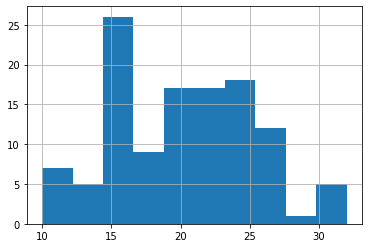

In [14]:
year_08.average_mileage.hist()

<AxesSubplot:>

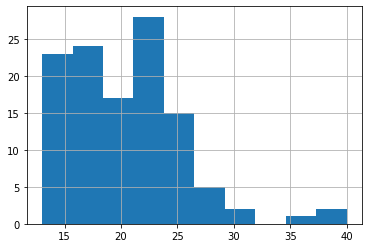

In [15]:
year_99.average_mileage.hist()

In [16]:
t, p = stats.ttest_ind(year_08.average_mileage, year_99.average_mileage)
t, p

(-0.24542297716258815, 0.8063459014623406)

In [17]:
if p < a:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


 ### Are compact cars more fuel-efficient than the average car?

In [18]:
# Are compact cars more fuel efficient than the average car?
# There is no difference in fuel efficiency between compact and average cars
# 1 sample, 1 tailed test

null_hypothesis = "The compact car is not more fuel efficient than the average car"
alternative_hypothesis = "The compact car is more fuel efficient than the average car"
confidence_level = .95
alpha = 1 - confidence_level # call your shot before you run your test

In [19]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,26.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,26.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [20]:
df.rename(columns={'class': 'vehicle_class'}, inplace=True)

In [21]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,26.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,26.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [22]:
compact_class = df[df.vehicle_class == 'compact']



<AxesSubplot:>

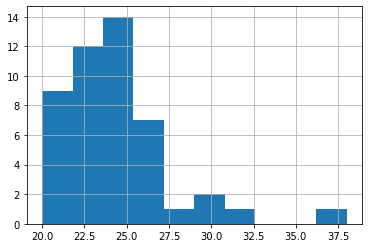

In [23]:
compact_class.average_mileage.hist()

In [24]:
df.average_mileage.mean()

20.14957264957265

In [25]:
compact_class.average_mileage.mean()

24.148936170212767

In [26]:
t, p = stats.ttest_1samp(compact_class.average_mileage, df.average_mileage.mean())

In [27]:
t, p

(7.900972010653462, 4.1406369298935154e-10)

In [28]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis", null_hypothesis) 
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis The compact car is not more fuel efficient than the average car
We move forward with the alternative hypothesis that The compact car is more fuel efficient than the average car


### Do manual cars get better gas mileage than automatic cars?

In [29]:
# Do manual cars get better gas mileage than automatic cars

null_hypothesis = "The manual vehicle does not get better gas mileage than the automatic vehicle"
alternative_hypothesis = "The manual vehicle gets better gas mileage than the automatic vehicle"
confidence_level = .95
alpha = 1 - confidence_level # call your shot before you run your test

In [30]:
manual = df[df.trans.str[0] == 'm']
auto = df[df.trans.str[0] == 'a']


<AxesSubplot:>

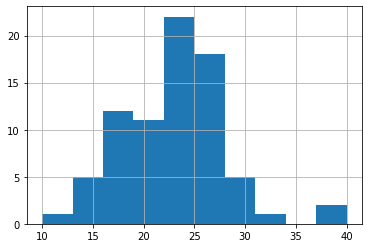

In [31]:
manual.average_mileage.hist()

<AxesSubplot:>

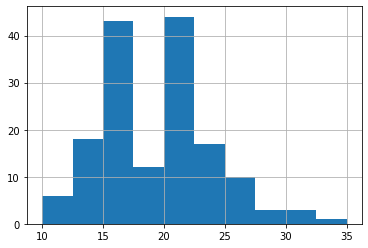

In [32]:
auto.average_mileage.hist()

In [33]:
t, p = stats.ttest_ind(manual.average_mileage, auto.average_mileage)
t, p

(4.577362852417845, 7.677168617852477e-06)

In [34]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis", null_hypothesis) 
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis The manual vehicle does not get better gas mileage than the automatic vehicle
We move forward with the alternative hypothesis that The manual vehicle gets better gas mileage than the automatic vehicle


In [92]:
telco = pd.read_csv(r"/Users/davidberchelmann/codeup-data-science/statistics-exercises/Cust_Churn_Telco.csv", header=1)

In [93]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?

In [94]:
null_hypothesis = "Customers who churn do not have a bill signficantly higher than the mean across all customers"
alternative_hypothesis = "Customers who churn do have a bill signficantly higher than the mean across all customers"
confidence_level = .95
alpha = 1 - confidence_level # call your shot before you run your test

In [95]:
churned = telco[telco.Churn == 'Yes']

<AxesSubplot:>

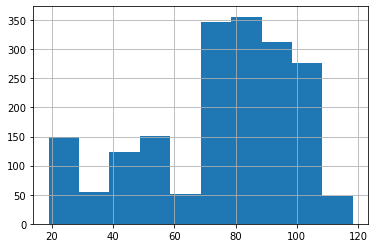

In [96]:
churned.MonthlyCharges.hist()

In [97]:
churned.MonthlyCharges.mean()

74.4413322632423

In [98]:
telco.MonthlyCharges.mean()

64.76169246059922

In [99]:
t, p = stats.ttest_1samp(churned.MonthlyCharges, telco.MonthlyCharges.mean())

t, p

(16.965403080505645, 3.7406392993841064e-60)

In [100]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis that Customers who churn do not have a bill signficantly higher than the mean across all customers
We move forward with the alternative hypothesis that Customers who churn do have a bill signficantly higher than the mean across all customers


### Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn?


In [101]:
null_hypothesis = "Customers who churn do not have a bill signficantly higher than the mean of those who don't churn"
alternative_hypothesis = "Customers who churn do have a bill signficantly higher than the mean aof those who churn"
confidence_level = .95
alpha = 1 - confidence_level # call your shot before you run your test

In [102]:
churned = telco[telco.Churn == 'Yes']
not_churned = telco[telco.Churn == 'No']

In [103]:
t, p = stats.ttest_ind(churned.MonthlyCharges, not_churned.MonthlyCharges)
t, p

(16.53673801593631, 2.706645606888261e-60)

In [104]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis", null_hypothesis) 
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis Customers who churn do not have a bill signficantly higher than the mean of those who don't churn
We move forward with the alternative hypothesis that Customers who churn do have a bill signficantly higher than the mean aof those who churn


In [105]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

- Does tenure correlate with monthly charges? 

In [112]:
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)

In [113]:
r, p

(0.24789985628615005, 4.0940449915016345e-99)

Text(0.5, 1.0, 'Tenure Length & Monthly Charges')

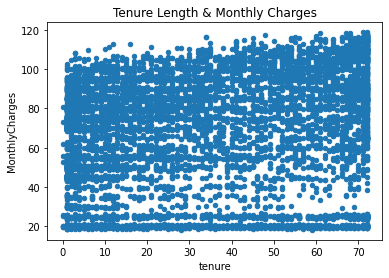

In [114]:
telco.plot.scatter('tenure', 'MonthlyCharges')
plt.title('Tenure Length & Monthly Charges')


In [117]:
non_na_telco = telco[telco.TotalCharges.isna() == False]

In [120]:
non_na_telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


- Does tenure correlate with total charges?

In [121]:
r, p = stats.pearsonr(non_na_telco.tenure, non_na_telco.TotalCharges)

In [123]:
r, p

(0.825880460933202, 0.0)

Text(0.5, 1.0, 'Tenure Length & Total Charges')

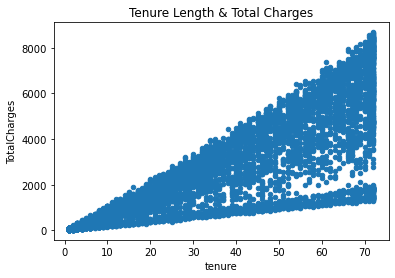

In [157]:
non_na_telco.plot.scatter('tenure', 'TotalCharges')
plt.title('Tenure Length & Total Charges')

- What happens if you control for phone and internet service?

In [166]:
services_telco = non_na_telco[(non_na_telco.PhoneService == 'Yes')&(non_na_telco.InternetService != 'No')]

In [167]:
r, p = stats.pearsonr(services_telco.tenure, services_telco.TotalCharges)

In [168]:
r, p

(0.9579229778029189, 0.0)

Text(0.5, 1.0, 'Tenure Length & Total Charges')

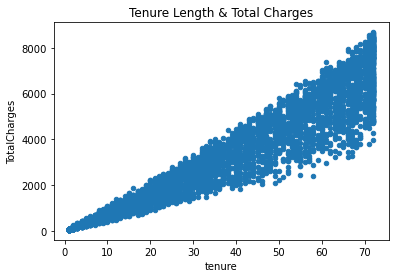

In [169]:
services_telco.plot.scatter('tenure', 'TotalCharges')
plt.title('Tenure Length & Total Charges')

In [170]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url


In [171]:
salaries = pd.read_sql('select * from employees join salaries ON salaries.emp_no = employees.emp_no join dept_emp ON dept_emp.emp_no = employees.emp_no join departments ON departments.dept_no = dept_emp.dept_no where salaries.to_date > curdate() AND dept_emp.to_date > curdate()', get_db_url('employees'))

In [192]:
salaries1 = salaries.loc[:, ~salaries.columns.duplicated()]

In [247]:


salaries1['test_days'] = (salaries1['from_date'] - salaries1['hire_date']).dt.days
salaries1 = salaries1.drop(['test_days'], axis=1)


In [248]:
salaries1.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,dept_no,dept_name,todays_date,days_from_hire
0,10038,1960-07-20,Huan,Lortz,M,1989-09-20,64254,2001-09-17,9999-01-01,d009,Customer Service,2021-02-12,11468
1,10049,1961-04-24,Basil,Tramer,F,1992-05-04,51326,2002-05-02,9999-01-01,d009,Customer Service,2021-02-12,10511
2,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,93188,2002-05-25,9999-01-01,d009,Customer Service,2021-02-12,12156
3,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,98003,2001-08-30,9999-01-01,d009,Customer Service,2021-02-12,11851
4,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,61070,2002-04-30,9999-01-01,d009,Customer Service,2021-02-12,12911


In [242]:
salaries1['todays_date'] = pd.to_datetime(str(date.today()), format='%Y-%m-%d')

In [237]:
salaries1['days_from_hire'] = (salaries1['todays_date'] - salaries1['hire_date']).dt.days

In [253]:
r, p = stats.pearsonr(salaries1.days_from_hire, salaries1.salary)

In [254]:
r, p

(0.3064625613186077, 0.0)

Text(0.5, 1.0, 'Salary vs Days at company')

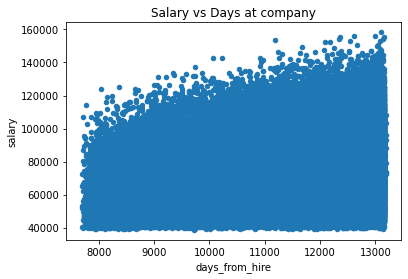

In [256]:
salaries1.plot.scatter('days_from_hire', 'salary')
plt.title('Salary vs Days at company')

###### Is there a relationship between how long an employee has been with the company and their salary?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      240124 non-null  int64         
 1   birth_date  240124 non-null  object        
 2   first_name  240124 non-null  object        
 3   last_name   240124 non-null  object        
 4   gender      240124 non-null  object        
 5   hire_date   240124 non-null  datetime64[ns]
 6   salary      240124 non-null  int64         
 7   from_date   240124 non-null  datetime64[ns]
 8   to_date     240124 non-null  object        
 9   dept_no     240124 non-null  object        
 10  dept_name   240124 non-null  object        
 11  test_dates  240124 non-null  int64         
 12  test_days   240124 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 23.8+ MB


In [197]:
salaries1['hire_date']= pd.to_datetime(salaries1['hire_date'])


<ipython-input-197-4c1e23197838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries1['hire_date']= pd.to_datetime(salaries1['hire_date'])


In [200]:
salaries1['from_date']= pd.to_datetime(salaries1['from_date'])

<ipython-input-200-8b7f9146e4b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries1['from_date']= pd.to_datetime(salaries1['from_date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      240124 non-null  int64         
 1   birth_date  240124 non-null  object        
 2   first_name  240124 non-null  object        
 3   last_name   240124 non-null  object        
 4   gender      240124 non-null  object        
 5   hire_date   240124 non-null  datetime64[ns]
 6   salary      240124 non-null  int64         
 7   from_date   240124 non-null  datetime64[ns]
 8   to_date     240124 non-null  object        
 9   dept_no     240124 non-null  object        
 10  dept_name   240124 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 20.2+ MB


##### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

##### Use the sleepstudy data. Is there a relationship between days and reaction time?

#### Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [308]:
index = ['Uses a Macbook', 'Doesnt Use A Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

In [309]:
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

In [310]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [311]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.8f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.00000000


In [273]:
df.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


##### Choose another 2 categorical variables from the mpg dataset and perform a chi**2 contingency table test with them. Be sure to state your null and alternative hypotheses.


In [266]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'vehicle_class', 'average_mileage'],
      dtype='object')

In [322]:
observed = pd.crosstab(df.model, df.drv)
observed

drv,4,f,r
model,,,
4runner 4wd,6,0,0
a4,0,7,0
a4 quattro,8,0,0
a6 quattro,3,0,0
altima,0,6,0
c1500 suburban 2wd,0,0,5
camry,0,7,0
camry solara,0,7,0
caravan 2wd,0,11,0


In [328]:
# Set our alpha
alpha = .05

In [329]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 6  0  0]
 [ 0  7  0]
 [ 8  0  0]
 [ 3  0  0]
 [ 0  6  0]
 [ 0  0  5]
 [ 0  7  0]
 [ 0  7  0]
 [ 0 11  0]
 [ 0  9  0]
 [ 0  5  0]
 [ 0  0  5]
 [ 9  0  0]
 [ 7  0  0]
 [ 0  0  3]
 [ 6  0  0]
 [ 7  0  0]
 [ 6  0  0]
 [ 8  0  0]
 [ 0  5  0]
 [ 0  5  0]
 [ 8  0  0]
 [ 0  9  0]
 [ 4  0  0]
 [ 2  0  0]
 [ 0  5  0]
 [ 0  3  0]
 [ 4  0  0]
 [ 0  0  9]
 [ 0  0  3]
 [ 0  6  0]
 [ 0  7  0]
 [ 4  0  0]
 [10  0  0]
 [ 4  0  0]
 [ 0  7  0]
 [ 0  7  0]
 [ 7  0  0]]
---
Expected

[[2.64102564 2.71794872 0.64102564]
 [3.08119658 3.17094017 0.74786325]
 [3.52136752 3.62393162 0.85470085]
 [1.32051282 1.35897436 0.32051282]
 [2.64102564 2.71794872 0.64102564]
 [2.2008547  2.26495726 0.53418803]
 [3.08119658 3.17094017 0.74786325]
 [3.08119658 3.17094017 0.74786325]
 [4.84188034 4.98290598 1.17521368]
 [3.96153846 4.07692308 0.96153846]
 [2.2008547  2.26495726 0.53418803]
 [2.2008547  2.26495726 0.53418803]
 [3.96153846 4.07692308 0.96153846]
 [3.08119658 3.17094017 0.74786325]
 [1.32051282 1.

In [330]:
null_hypothesis = "The model is independent of the drivetrain type"
alternative_hypothesis = "The model is not indpendent of the drivetrain type"

In [331]:
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis
